### import packages

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from io import StringIO
from sklearn.tree import export_graphviz
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

In [2]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Description of columns
##### `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
##### `country_long` (text): longer form of the country designation
##### `name` (text): name or title of the power plant, generally in Romanized form
##### `gppd_idnr` (text): 10 or 12 character identifier for the power plant
##### `capacity_mw` (number): electrical generating capacity in megawatts
##### `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
##### `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
##### `primary_fuel` (text): energy source used in primary electricity generation or export
##### `other_fuel1` (text): energy source used in electricity generation or export
##### `other_fuel2` (text): energy source used in electricity generation or export
##### `other_fuel3` (text): energy source used in electricity generation or export
##### `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
##### `owner` (text): majority shareholder of the power plant, generally in Romanized form
##### `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
##### `url` (text): web document corresponding to the `source` field
##### `geolocation_source` (text): attribution for geolocation information
##### `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
##### `year_of_capacity_data` (number): year the capacity information was reported
##### `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
##### `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
##### `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
##### `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
##### `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
##### `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
##### `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
##### `generation_data_source` (text): attribution for the reported generation information
##### `estimated_generation_gwh` (number): estimated electricity generation in gigawatt-hours
##### We define the "Fuel Type" attribute of our database based on common fuel categories.
### Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw

# Start Analyzes on dataset

In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.country.value_counts()

IND    908
Name: country, dtype: int64

In [5]:
df.country_long.value_counts()

India    908
Name: country_long, dtype: int64

In [6]:
df.name.value_counts()

ZAWAR MINES                                   1
Ravra - NWEPL Solar Power Plant               1
Nokh - Precision Technik Solar Power Plant    1
Askandra - Khaya Solar Power Plant            1
KUTTIYADI Add ext                             1
                                             ..
PAMPORE GT                                    1
NIMOO BAZGO                                   1
HALDIA                                        1
Dhursar                                       1
MELAMARUTHUR (MUTHIARA)                       1
Name: name, Length: 908, dtype: int64

In [7]:
df.gppd_idnr.value_counts()

WRI1026122    1
IND0000174    1
WRI1019884    1
WRI1026108    1
WRI1019948    1
             ..
IND0000190    1
WRI1026148    1
WRI1019980    1
IND0000459    1
IND0000479    1
Name: gppd_idnr, Length: 908, dtype: int64

In [8]:
df.wepp_id.value_counts()

Series([], Name: wepp_id, dtype: int64)

In [9]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [10]:
df.other_fuel3.value_counts()

Series([], Name: other_fuel3, dtype: int64)

In [11]:
df.other_fuel1.value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [12]:
df.commissioning_year.value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1958.0     1
1949.0     1
1954.0     1
1956.0     1
1927.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [13]:
df.owner.value_counts()

Jk Cement ltd                           4
Sterling Agro Industries ltd.           4
Acc Acc ltd                             4
Ujaas Energy Limited                    3
Hindustan Zinc ltd                      3
                                       ..
Varam Pvt ltd                           1
Mukand Mukand ltd                       1
Vaayu Renew                             1
Khaya Solar Projects Private Limited    1
Precision Technik Private Limited       1
Name: owner, Length: 280, dtype: int64

In [14]:
df.source.value_counts()

Central Electricity Authority                       520
CDM                                                 124
Lancosola                                            10
National Renewable Energy Laboratory                  8
National Thermal Power Corporation (NTPC)             6
                                                   ... 
Gangakhed Energy ltd                                  1
Clover Solar Private Limited (CSPL)                   1
Datta Ssk ltd                                         1
Welspun Solar AP Private Limited                      1
Gujarat Industries Power Company Limited (GIPCL)      1
Name: source, Length: 191, dtype: int64

In [15]:
df.url.value_counts()

http://www.cea.nic.in/                                                                                                                     520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                              7
http://www.ntpc.co.in                                                                                                                        6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                             5
https://cdm.unfccc.int/Projects/DB/SGS-UKL1333450990.34/view                                                                                 4
                                                                                                                                          ... 
http://www.punjlloyd.com/energy/renewables                                                                                                   1

In [16]:
df.latitude.value_counts()

24.1917    3
19.0004    3
16.5697    2
23.4639    2
13.2450    2
          ..
20.9099    1
17.2387    1
23.5594    1
27.3426    1
16.5973    1
Name: latitude, Length: 837, dtype: int64

In [17]:
df.longitude.value_counts()

71.6917    4
71.6918    3
75.8988    3
72.8983    3
81.2875    3
          ..
80.1264    1
76.1137    1
74.6447    1
86.0970    1
79.5748    1
Name: longitude, Length: 828, dtype: int64

In [18]:
df.estimated_generation_gwh.value_counts()

Series([], Name: estimated_generation_gwh, dtype: int64)

In [19]:
df.year_of_capacity_data.value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

In [20]:
df.generation_data_source.value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [21]:
df.generation_gwh_2013.value_counts()

0.00000        21
14881.88000     1
42.49645        1
2036.00000      1
97.73885        1
               ..
7229.33000      1
657.21740       1
507.89775       1
8556.42400      1
8211.00000      1
Name: generation_gwh_2013, Length: 364, dtype: int64

In [22]:
df.generation_gwh_2014.value_counts()

0.00000       28
6803.31250     1
4735.13000     1
145.81400      1
2022.57000     1
              ..
6224.00000     1
268.48085      1
1255.73200     1
164.32425      1
1153.65300     1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [23]:
df.generation_gwh_2015.value_counts()

0.00000       28
5837.76600     1
1297.97750     1
8076.81050     1
1.09395        1
              ..
2636.86400     1
665.19730      1
1516.36010     1
741.86205      1
7130.50700     1
Name: generation_gwh_2015, Length: 398, dtype: int64

In [24]:
df.generation_gwh_2016.value_counts()

0.00000       31
8470.57000     2
1511.00000     2
7.31325        1
94.85500       1
              ..
433.84800      1
283.74811      1
259.94375      1
403.96000      1
307.87290      1
Name: generation_gwh_2016, Length: 405, dtype: int64

In [25]:
df.generation_gwh_2017.value_counts()

0.00000       33
170.08530      2
344.35955      1
2265.47000     1
59.43135       1
              ..
214.48220      1
272.73945      1
2887.00000     1
12.73600       1
158.73235      1
Name: generation_gwh_2017, Length: 410, dtype: int64

In [26]:
df.source.value_counts()

Central Electricity Authority                       520
CDM                                                 124
Lancosola                                            10
National Renewable Energy Laboratory                  8
National Thermal Power Corporation (NTPC)             6
                                                   ... 
Gangakhed Energy ltd                                  1
Clover Solar Private Limited (CSPL)                   1
Datta Ssk ltd                                         1
Welspun Solar AP Private Limited                      1
Gujarat Industries Power Company Limited (GIPCL)      1
Name: source, Length: 191, dtype: int64

### drop column & their reason
### country and country long: the whole dataset contains same value 
### name, gppd_idnr: unique for everyone
### wepp_id,estimated_generation_gwh, other_fuel2, other_fuel3: almost whole column empty 
### other_fuel1: almost whole column is empty, only 1 category value is entered & other 2 values are only entered once or twice
### latitude, longitude: contains almost same value over the whole dataset
### url, owner, commissioning_year, source: (logical reasoning) a model should not conclude fuel type or capacity mw from owner name or url or the year it started. who reports doesnt matter hence drop source too
### year_of_capacity_data, generation_data_source: it contains only 1 datapoint rest is null

In [27]:
df=df.drop(['country','country_long','name','gppd_idnr','wepp_id','other_fuel2','other_fuel3','other_fuel1','url','owner',
           'longitude','latitude','estimated_generation_gwh','year_of_capacity_data','generation_data_source',
           'commissioning_year','source'],axis=1)
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,Coal,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,Solar,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN


### create a new column fuel type

In [28]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

### create fuel types as renewable and non renewable fuel

In [29]:
renew=['Solar','Hydro','Wind','Biomass']
nonrenew=['Coal','Nuclear','Oil','Gas']
df['fuel_type']=0
for i in range(len(df.primary_fuel)):
    if df.primary_fuel[i] in renew:
        df.fuel_type[i]=0
    elif df.primary_fuel[i] in nonrenew:
        df.fuel_type[i]=1

In [30]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (908, 9)


In [31]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    object 
 2   geolocation_source   889 non-null    object 
 3   generation_gwh_2013  384 non-null    float64
 4   generation_gwh_2014  401 non-null    float64
 5   generation_gwh_2015  425 non-null    float64
 6   generation_gwh_2016  437 non-null    float64
 7   generation_gwh_2017  443 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 64.0+ KB


### From above we can conclude that null are present in  geolocation_source, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_data_source columns.
### fuel_type (categorical data) is of int dtype
### generation_data_source, geolocation_source, source, primary_fuel is of type object (string)
### capacity_mw, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_data_source columns are of float dtype

### start analyzes and fill missing data
### missing data in geolocation_source

In [33]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [34]:
df[df['geolocation_source'].isnull()]['primary_fuel'].value_counts()

Wind     15
Solar     4
Name: primary_fuel, dtype: int64

In [35]:
df[df['primary_fuel']=='Wind']['geolocation_source'].value_counts()

WRI    108
Name: geolocation_source, dtype: int64

In [36]:
df[df['primary_fuel']=='Solar']['geolocation_source'].value_counts()

Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

### for null rows of geolocation_source fill it with WRI if primary_fuel is solar else Industry About

In [37]:
for i in range(len(df['geolocation_source'])):
    if str(df['geolocation_source'][i])=='nan':
        if df['primary_fuel'][i]=='Solar':
            df['geolocation_source'][i]='Industry About'
        elif df['primary_fuel'][i]=='Wind':
            df['geolocation_source'][i]='WRI'

### fill missing values of generation_gwh_2013

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

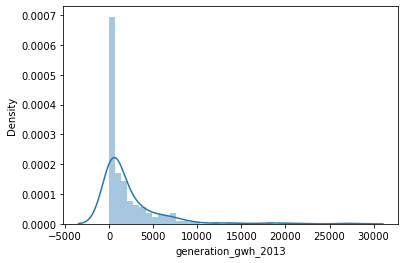

In [38]:
sn.distplot(df['generation_gwh_2013'])

### because generation_gwh_2013 has normal dist plot fill null values using mean of generation_gwh_2013

In [39]:
for i in range(len(df['generation_gwh_2013'])):
    if str(df['generation_gwh_2013'][i])=='nan':
        df['generation_gwh_2013'][i]=df['generation_gwh_2013'].mean()

### fill missing values of generation_gwh_2014

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

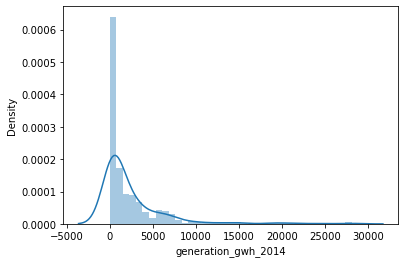

In [40]:
sn.distplot(df['generation_gwh_2014'])

### because generation_gwh_2014 has normal dist plot fill null values using mean of generation_gwh_2014

In [41]:
for i in range(len(df['generation_gwh_2014'])):
    if str(df['generation_gwh_2014'][i])=='nan':
        df['generation_gwh_2014'][i]=df['generation_gwh_2014'].mean()

### fill missing values of generation_gwh_2015

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

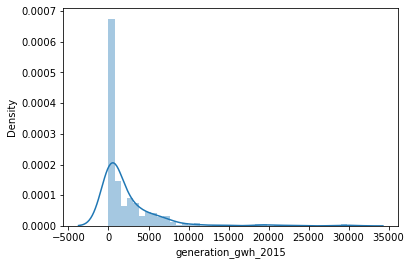

In [42]:
sn.distplot(df['generation_gwh_2015'])

### because generation_gwh_2015 has normal dist plot fill null values using mean of generation_gwh_2015

In [43]:
for i in range(len(df['generation_gwh_2015'])):
    if str(df['generation_gwh_2015'][i])=='nan':
        df['generation_gwh_2015'][i]=df['generation_gwh_2015'].mean()

### fill missing values of generation_gwh_2016

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

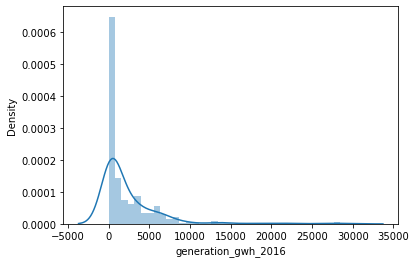

In [44]:
sn.distplot(df['generation_gwh_2016'])

### because generation_gwh_2016 has normal dist plot fill null values using mean of generation_gwh_2016

In [45]:
for i in range(len(df['generation_gwh_2016'])):
    if str(df['generation_gwh_2016'][i])=='nan':
        df['generation_gwh_2016'][i]=df['generation_gwh_2016'].mean()

### fill missing values of generation_gwh_2017

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

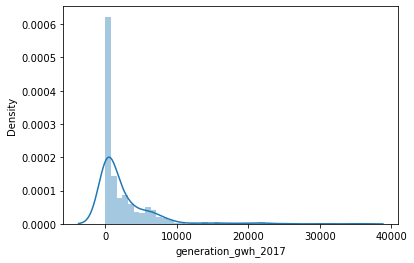

In [46]:
sn.distplot(df['generation_gwh_2017'])

### because generation_gwh_2017 has normal dist plot fill null values using mean of generation_gwh_2017

In [47]:
for i in range(len(df['generation_gwh_2017'])):
    if str(df['generation_gwh_2017'][i])=='nan':
        df['generation_gwh_2017'][i]=df['generation_gwh_2017'].mean()

### all missing values are now filled

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    object 
 2   geolocation_source   908 non-null    object 
 3   generation_gwh_2013  908 non-null    float64
 4   generation_gwh_2014  908 non-null    float64
 5   generation_gwh_2015  908 non-null    float64
 6   generation_gwh_2016  908 non-null    float64
 7   generation_gwh_2017  908 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 64.0+ KB


### conv categorical column to numerical column

In [49]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [50]:
dicty={}
for i in df[['primary_fuel']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'primary_fuel': {'Solar': 0,
  'Coal': 1,
  'Wind': 2,
  'Gas': 3,
  'Hydro': 4,
  'Biomass': 5,
  'Oil': 6,
  'Nuclear': 7}}

In [51]:
for i in ['primary_fuel']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [52]:
df.geolocation_source.value_counts()

WRI                                     781
Industry About                          123
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [53]:
dicty={}
for i in df[['geolocation_source']]:
    dicto={}
    for j in range(len(df[i].unique())):
        dicto[df[i].unique()[j]]=j
    dicty[i]=dicto
dicty

{'geolocation_source': {'National Renewable Energy Laboratory': 0,
  'WRI': 1,
  'Industry About': 2}}

In [54]:
for i in ['geolocation_source']:
    df[i]=df[i].apply(lambda x:dicty[i][x])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   primary_fuel         908 non-null    int64  
 2   geolocation_source   908 non-null    int64  
 3   generation_gwh_2013  908 non-null    float64
 4   generation_gwh_2014  908 non-null    float64
 5   generation_gwh_2015  908 non-null    float64
 6   generation_gwh_2016  908 non-null    float64
 7   generation_gwh_2017  908 non-null    float64
 8   fuel_type            908 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 64.0 KB


### All null values and categorical values filled

In [56]:
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
0,2.5,0,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
1,98.0,1,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
2,39.2,2,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
3,135.0,3,1,631.777928,617.789264,843.747000,886.004428,663.774500,1
4,1800.0,1,1,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,1
...,...,...,...,...,...,...,...,...,...
903,1600.0,1,1,2304.059202,2420.393316,0.994875,233.596650,865.400000,1
904,3.0,0,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
905,25.5,2,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
906,80.0,1,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1


### now use describe func and analyze dataset

In [57]:
df.describe()

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,2.368943,1.131057,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.394273
std,580.221767,1.732816,0.350467,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411,0.488963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1.000000,1.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887,0.000000
50%,60.000000,2.000000,1.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.000000
75%,388.125000,4.000000,1.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1.000000
max,4760.000000,7.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


### check data imbalancement and balance if required

In [58]:
print('Number of fuel_type are:',df['fuel_type'].value_counts()[0])
print('Number of fuel_type are:',df['fuel_type'].value_counts()[1])
print('Unbalanced dataset' if df['fuel_type'].value_counts()[0]!=df['fuel_type'].value_counts()[1] else 'Balanced dataset')

Number of fuel_type are: 550
Number of fuel_type are: 358
Unbalanced dataset


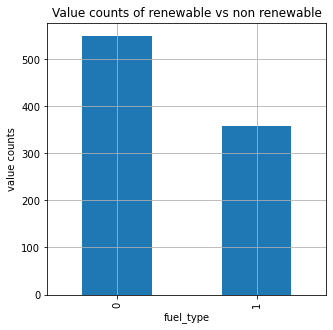

In [59]:
plt.figure(figsize=[5,5])
df['fuel_type'].value_counts().plot(kind='bar')
plt.xlabel("fuel_type")
plt.ylabel('value counts')
plt.title('Value counts of renewable vs non renewable')
plt.grid()

In [60]:
dfmin=df[df['fuel_type']==1]
dfmax=df[df['fuel_type']==0]
dfminup=resample(dfmin,replace=True,n_samples=550,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[0])
print('Number of fuel_type are:',dff['fuel_type'].value_counts()[1])
print('Unbalanced dataset' if dff['fuel_type'].value_counts()[0]!=dff['fuel_type'].value_counts()[1] else 'Balanced dataset')

Number of fuel_type are: 550
Number of fuel_type are: 550
Balanced dataset


### start analyzing to find correlation and the columns to drop

In [61]:
dff.corr()['fuel_type']

capacity_mw            0.433637
primary_fuel          -0.270903
geolocation_source    -0.335859
generation_gwh_2013    0.193872
generation_gwh_2014    0.204994
generation_gwh_2015    0.203246
generation_gwh_2016    0.221738
generation_gwh_2017    0.235696
fuel_type              1.000000
Name: fuel_type, dtype: float64

### use heatmap to check correlation on dataset

<AxesSubplot:>

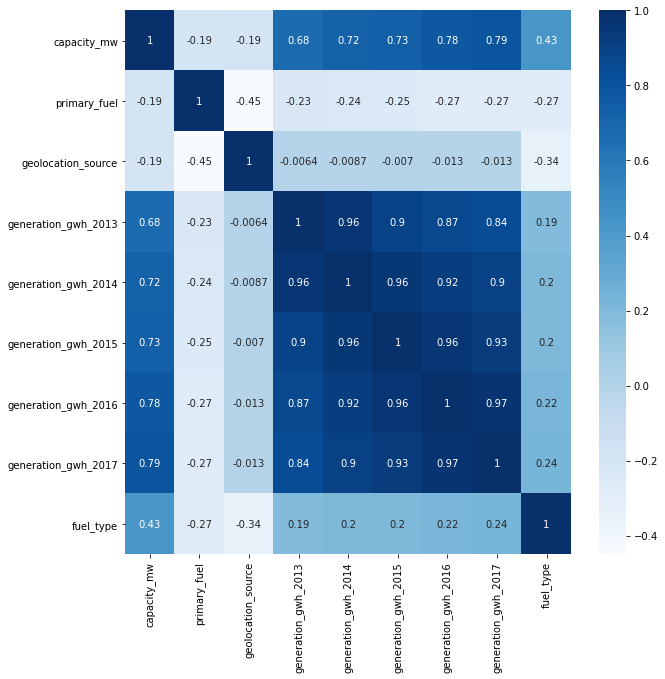

In [62]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True,cmap='Blues')

### check the graphical relation between fuel_type column and rest

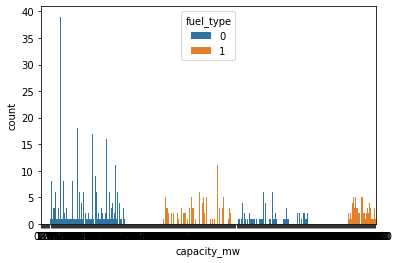

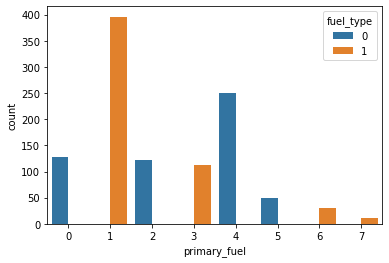

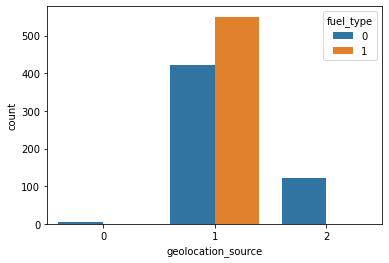

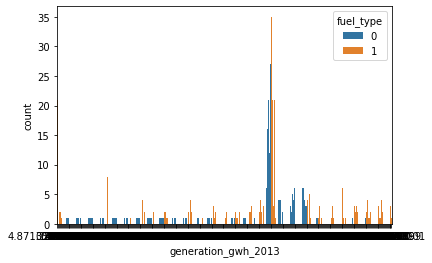

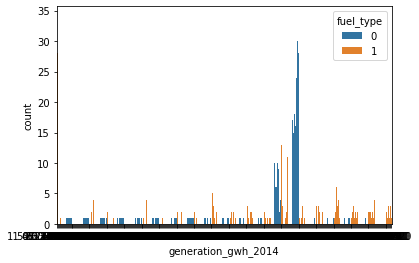

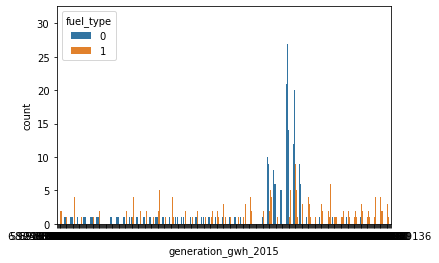

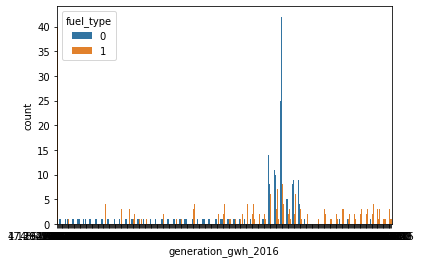

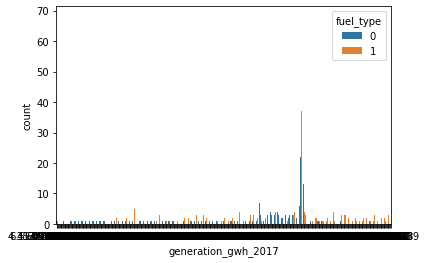

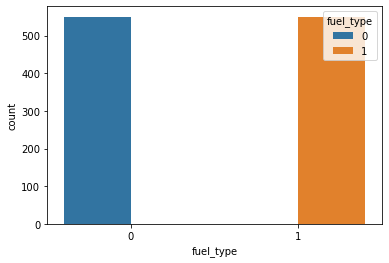

In [63]:
for i in dff.columns:
    sn.countplot(x=i,hue="fuel_type",data=dff)
    plt.show()

### check dist plots of all columns

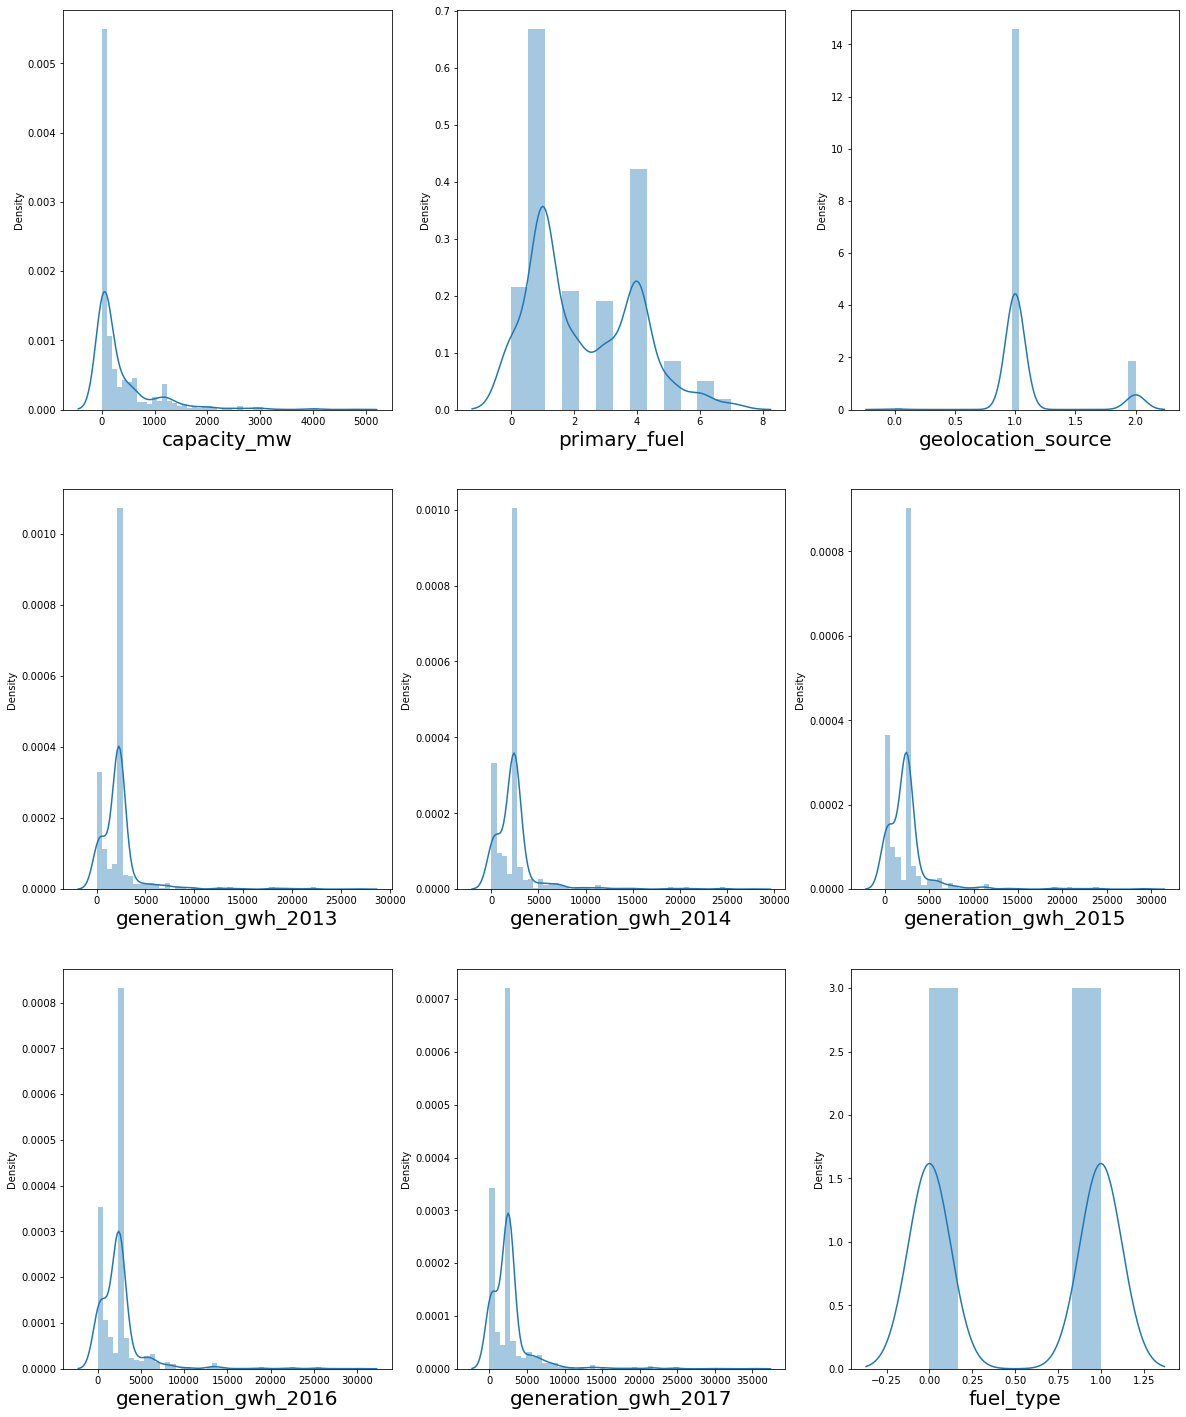

In [65]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### columns having bimodal distribution plot: primary fuel, geolocation_source
### rest all columns have almost normal distribution plot being positively skewed
### check for outliers

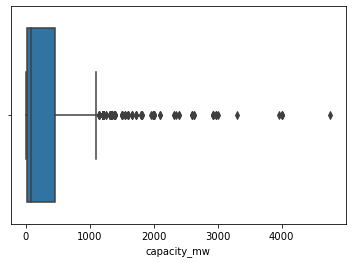

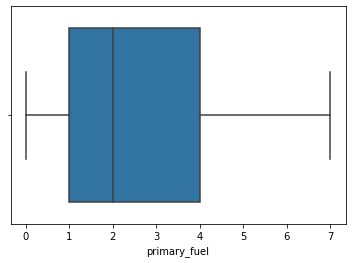

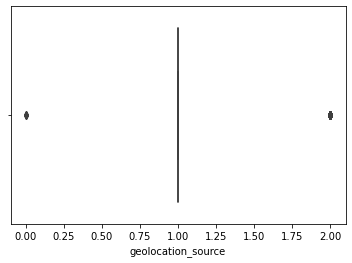

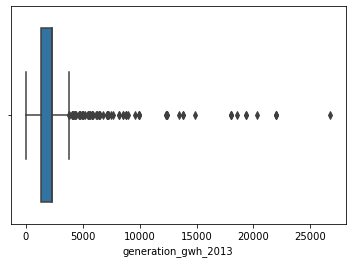

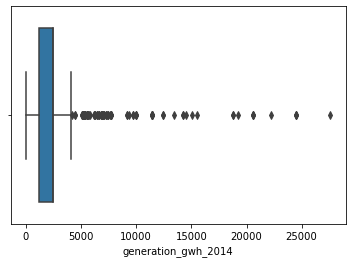

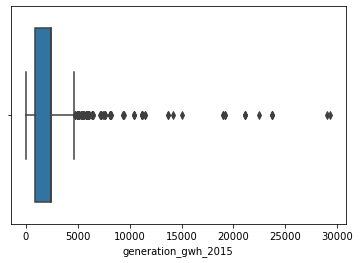

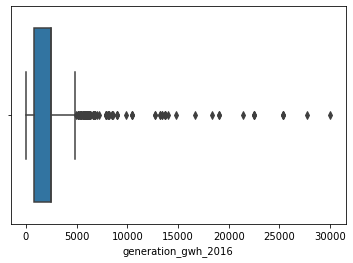

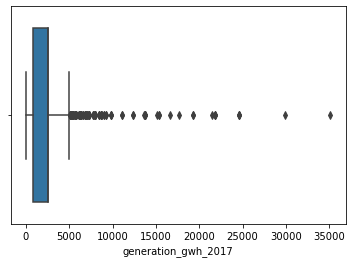

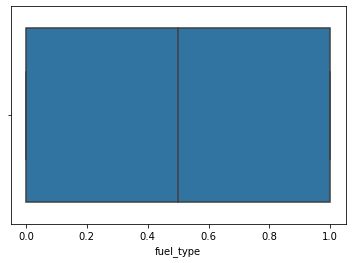

In [66]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

### there are outliers present in all non categorical columns. try to remove them

In [67]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(1100, 9)
(1065, 9)


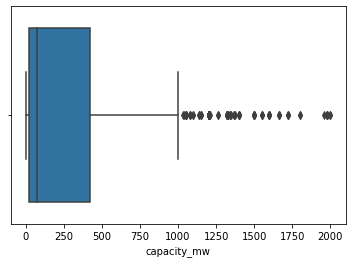

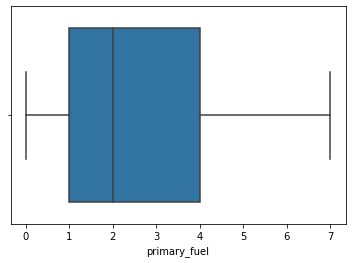

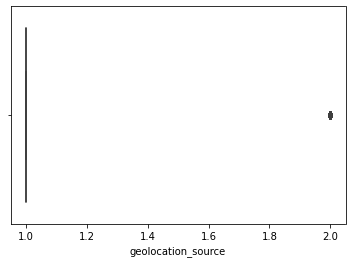

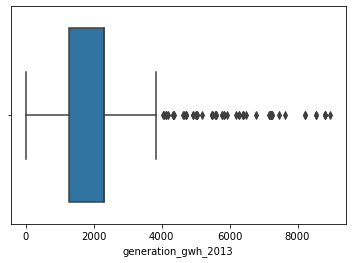

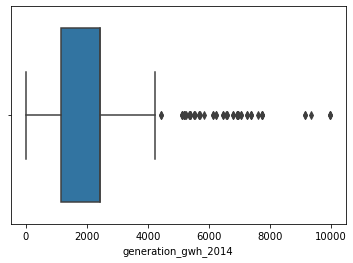

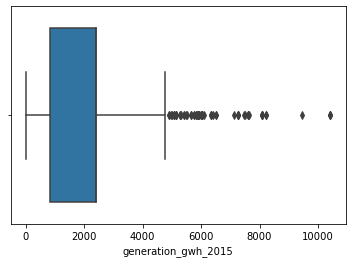

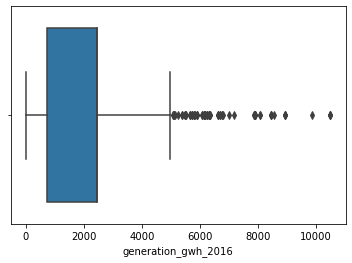

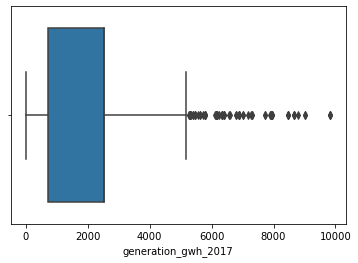

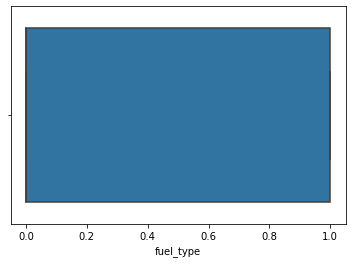

In [68]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [69]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(1065, 9)
(1007, 9)


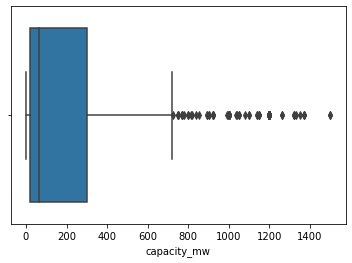

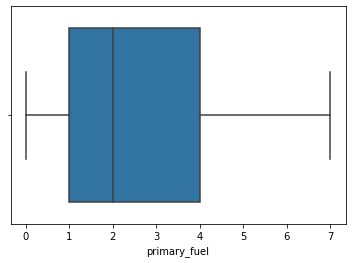

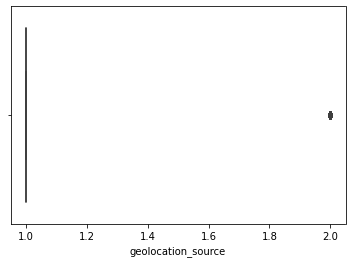

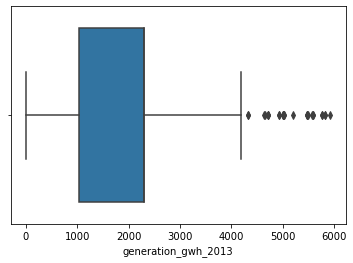

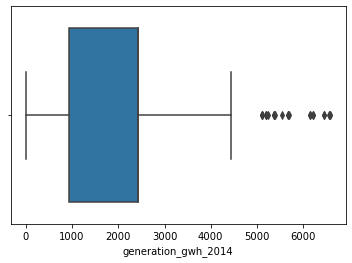

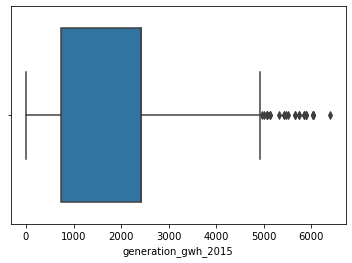

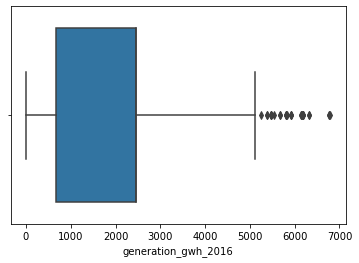

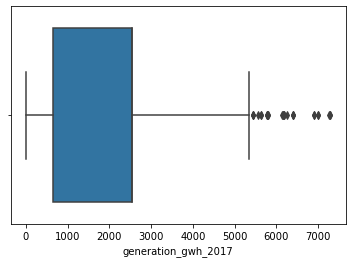

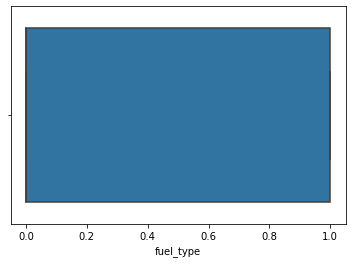

In [70]:
for i in df.columns:
    sn.boxplot(df[i])
    plt.show()

In [71]:
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(1007, 9)
(945, 9)


### this iteration of zscore causes data loss more than 10%. hence use prev iteration which is df

In [72]:
y = df[['fuel_type']]
x = df.drop(columns = ['fuel_type'])

### check biasing and fix it

In [73]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

capacity_mw            1.865193
primary_fuel           0.374653
geolocation_source     2.311286
generation_gwh_2013    0.199896
generation_gwh_2014    0.278528
generation_gwh_2015    0.296078
generation_gwh_2016    0.488964
generation_gwh_2017    0.534677
dtype: float64
2


In [74]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [75]:
#lets again check the skewness
print(x.skew())
print()
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55 

capacity_mw            0.710494
primary_fuel           0.374653
geolocation_source     2.311286
generation_gwh_2013    0.199896
generation_gwh_2014    0.278528
generation_gwh_2015    0.296078
generation_gwh_2016    0.488964
generation_gwh_2017    0.534677
dtype: float64

2


In [76]:
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
2,3.396999,2,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
6,3.914868,4,1.0,147.568450,157.558250,152.195200,61.421350,89.629600
7,5.768998,4,1.0,696.738800,674.391100,721.335200,675.724400,679.594950
8,6.619106,4,1.0,504.813250,480.594950,144.434200,402.029750,439.372100
11,5.117230,4,1.0,731.334950,614.412500,665.197300,670.500650,644.570950
...,...,...,...,...,...,...,...,...
74,2.154435,1,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
473,10.000000,1,1.0,4724.030000,5111.950000,5882.550000,6189.110000,5101.265600
190,10.000000,1,1.0,4117.682000,3633.396000,4179.266000,6327.030000,6182.040900
168,10.626586,1,1.0,2304.059202,481.945750,5837.766000,6164.740000,3444.420000


### scale non categorical data

In [77]:
scaler = StandardScaler()
x[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = scaler.fit_transform(x[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
x

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
2,-0.503184,2,1.0,0.384366,0.396953,0.405586,0.389112,0.376835
6,-0.310035,4,1.0,-1.637834,-1.556754,-1.465043,-1.463775,-1.424358
7,0.381497,4,1.0,-1.122862,-1.110526,-0.994350,-0.988027,-0.989228
8,0.698560,4,1.0,-1.302836,-1.277847,-1.471462,-1.199990,-1.166405
11,0.138408,4,1.0,-1.090421,-1.162311,-1.040778,-0.992072,-1.015060
...,...,...,...,...,...,...,...,...
74,-0.966621,1,1.0,0.384366,0.396953,0.405586,0.389112,0.376835
473,1.959527,1,1.0,2.653638,2.720814,3.274105,3.281824,2.271982
190,1.959527,1,1.0,2.085049,1.444246,1.865446,3.388636,3.069109
168,2.193224,1,1.0,0.384366,-1.276681,3.237068,3.262950,1.049973


### Classification part

### performing pca and choose appropriate component to train model

In [81]:
for i in range(2,9):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.802382901581455
3 0.9150632560808349
4 0.965642263450306
5 0.9825219113449846
6 0.9932487286550906
7 0.9995224418280646
8 1.0000000000000002


### i will use 4 as data retention is good(personal choice)

In [82]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

### algo to find best train test random split for classification issue

In [79]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

### All models we are going to use to iterate and find the best model

In [80]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [83]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8403035176315047
roc 0.69621189701095
diff 0.1440916206205547
**********
DecisionTreeClassifier()
score 0.9884482686375229
roc 0.9762750320607675
diff 0.012173236576755397
**********
KNeighborsClassifier()
score 0.9974547924026673
roc 0.9854493439873729
diff 0.012005448415294384
**********
RandomForestClassifier()
score 0.9996429195835772
roc 0.9762750320607675
diff 0.023367887522809716
**********
SVC()
score 0.9565925572725893
roc 0.9531912794712439
diff 0.0034012778013453593
**********
RidgeClassifier()
score 0.8405201095241193
roc 0.6693301765808425
diff 0.17118993294327678
**********
BaggingClassifier()
score 0.9996118829334547
roc 0.9701094998520272
diff 0.029502383081427497
**********
GradientBoostingClassifier()
score 0.9991310315929403
roc 0.9808621880240702
diff 0.01826884356887004
**********
SGDClassifier()
score 0.7550269981288426
roc 0.7447469665581533
diff 0.010280031570689241
**********
LGBMClassifier()
score 0.9992864171308437
roc 

### Top models are:
#### AdaBoostClassifier: cv score: 98.5% pred score: 98% diff: 0.5%
#### ExtraTreesClassifier: cv score: 99.8% pred score: 98% diff: 1.9%
#### LGBMClassifier: cv score: 99.98% pred score: 98% diff: 1.8%
#### GradientBoostingClassifier: cv score: 99.91% pred score: 98% diff: 1.8%
#### KNeighborsClassifier: cv score: 99.7% pred score: 98.5% diff: 1.2%
#### choosing KNeighborsClassifier as it has better accuracy and reasonable difference which indicates less underfitting and overfitting problems

In [87]:
parameters={"n_neighbors":list(range(1,11)),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    2.8s finished


{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}

### find best random state

In [88]:
besttrain(KNeighborsClassifier(n_neighbors=4,algorithm='auto',weights='uniform'),principalComponents,y)

maximum roc_auc_score is at random state : 43  and it is : 1.0


### best random state is 43
### build model, train it & test it

In [89]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 43,test_size=0.20,stratify=y)
classmodel=KNeighborsClassifier(n_neighbors=4,algorithm='auto',weights='uniform')
classmodel.fit(x_train,y_train)
y_pred=classmodel.predict(x_test)

### check all the metrics of the model

In [92]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[109   0]
 [  0  93]]
f1 score is :  1.0
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        93

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202

AUC ROC Score:  1.0
CV mean 0.9999901351484659
std: 1.972970306796107e-05


### confusion matrix looks perfect on test dataset
### acc varies from 1.0 to 99.99%
### std error is 1.972%

### test on all whole dataset

In [93]:
y_pred=classmodel.predict(principalComponents)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[542   1]
 [  2 462]]
f1 score is :  0.9967637540453075
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       543
           1       1.00      1.00      1.00       464

    accuracy                           1.00      1007
   macro avg       1.00      1.00      1.00      1007
weighted avg       1.00      1.00      1.00      1007

AUC ROC Score:  0.9969240172731313
CV mean 0.9999901351484659
std: 1.972970306796107e-05


### confusion matrix has 2 false positive and 1 true negative
### acc varies from 99.99% to 99.67%

### Roc curve of the rfmodel is shown below

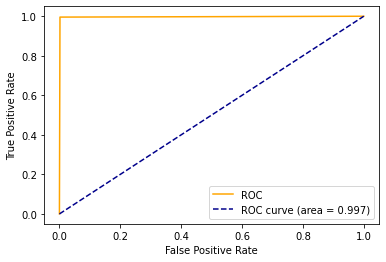

In [94]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### from the above we get all the metrics of the currently trained model.
### put fuel_type column and predicted fuel_type column side by side to observe the diff between these two columns

In [97]:
x['fuel_typepred']=y_pred
x['fuel_type']=y
x[['fuel_type','fuel_typepred']]

,fuel_type,fuel_typepred
2,0,0
6,0,0
7,0,0
8,0,0
11,0,0
...,...,...
74,1,1
473,1,1
190,1,1
168,1,1


In [101]:
print('Number of falsely predicted fuel_type nonrenewable',x.fuel_type.value_counts()[1]-x.fuel_typepred.value_counts()[1])

Number of falsely predicted fuel_type nonrenewable 1


In [100]:
print('Number of falsely predicted fuel_type renewable',x.fuel_typepred.value_counts()[0]-x.fuel_type.value_counts()[0])

Number of falsely predicted fuel_type renewable 1


### analyze how similar dist plot are of actual and predicted values

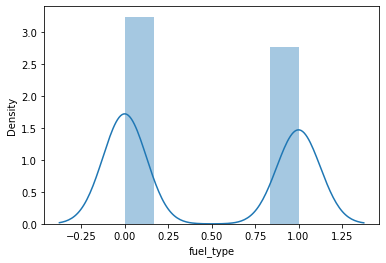

<AxesSubplot:xlabel='fuel_typepred', ylabel='Density'>

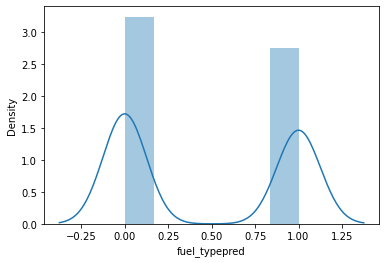

In [104]:
sn.distplot(x['fuel_type'])
plt.show()
sn.distplot(x['fuel_typepred'])

### heatmap of the confusion matrix

<AxesSubplot:>

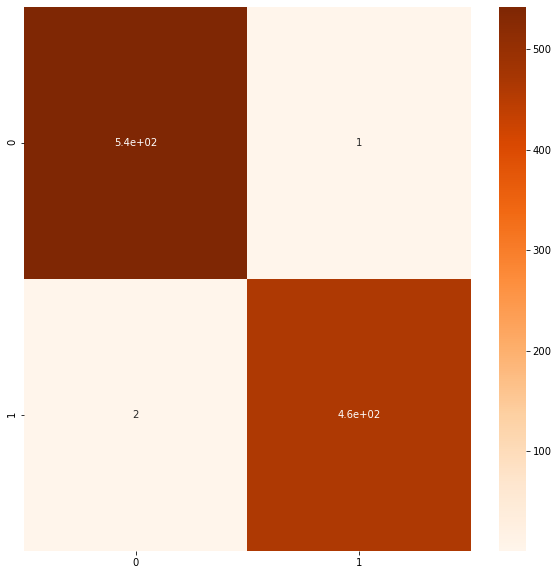

In [106]:
plt.figure(figsize=[10,10])
sn.heatmap(confusion_matrix(x['fuel_type'],x['fuel_typepred']),annot=True,cmap="Oranges",xticklabels=classmodel.classes_
               ,yticklabels=classmodel.classes_)

### 2 false positive were detected
### 1 true negative
### Save model

In [107]:
joblib.dump(classmodel, 'fuel_type.pkl')

['fuel_type.pkl']

### regression part

In [109]:
y = df[['capacity_mw']]
x = df.drop(columns = ['capacity_mw'])
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
2,2,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
6,4,1,147.568450,157.558250,152.195200,61.421350,89.629600,0
7,4,1,696.738800,674.391100,721.335200,675.724400,679.594950,0
8,4,1,504.813250,480.594950,144.434200,402.029750,439.372100,0
11,4,1,731.334950,614.412500,665.197300,670.500650,644.570950,0
...,...,...,...,...,...,...,...,...
74,1,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
473,1,1,4724.030000,5111.950000,5882.550000,6189.110000,5101.265600,1
190,1,1,4117.682000,3633.396000,4179.266000,6327.030000,6182.040900,1
168,1,1,2304.059202,481.945750,5837.766000,6164.740000,3444.420000,1


### check for biasing and fix it

In [110]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel           0.374653
geolocation_source     2.311286
generation_gwh_2013    0.199896
generation_gwh_2014    0.278528
generation_gwh_2015    0.296078
generation_gwh_2016    0.488964
generation_gwh_2017    0.534677
fuel_type              0.157622
dtype: float64
1


In [111]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [112]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

primary_fuel           0.374653
geolocation_source     2.311286
generation_gwh_2013    0.199896
generation_gwh_2014    0.278528
generation_gwh_2015    0.296078
generation_gwh_2016    0.488964
generation_gwh_2017    0.534677
fuel_type              0.157622
dtype: float64
1


In [113]:
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
2,2,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0
6,4,1.0,147.568450,157.558250,152.195200,61.421350,89.629600,0
7,4,1.0,696.738800,674.391100,721.335200,675.724400,679.594950,0
8,4,1.0,504.813250,480.594950,144.434200,402.029750,439.372100,0
11,4,1.0,731.334950,614.412500,665.197300,670.500650,644.570950,0
...,...,...,...,...,...,...,...,...
74,1,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,1
473,1,1.0,4724.030000,5111.950000,5882.550000,6189.110000,5101.265600,1
190,1,1.0,4117.682000,3633.396000,4179.266000,6327.030000,6182.040900,1
168,1,1.0,2304.059202,481.945750,5837.766000,6164.740000,3444.420000,1


### Scale non categorical data

In [114]:
scaler = StandardScaler()
x[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = scaler.fit_transform(x[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,fuel_type
2,2,1.0,0.384366,0.396953,0.405586,0.389112,0.376835,0
6,4,1.0,-1.637834,-1.556754,-1.465043,-1.463775,-1.424358,0
7,4,1.0,-1.122862,-1.110526,-0.994350,-0.988027,-0.989228,0
8,4,1.0,-1.302836,-1.277847,-1.471462,-1.199990,-1.166405,0
11,4,1.0,-1.090421,-1.162311,-1.040778,-0.992072,-1.015060,0
...,...,...,...,...,...,...,...,...
74,1,1.0,0.384366,0.396953,0.405586,0.389112,0.376835,1
473,1,1.0,2.653638,2.720814,3.274105,3.281824,2.271982,1
190,1,1.0,2.085049,1.444246,1.865446,3.388636,3.069109,1
168,1,1.0,0.384366,-1.276681,3.237068,3.262950,1.049973,1


### check multicorrelation and drop columns accordingly

In [116]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.087442,primary_fuel
1,4.017409,geolocation_source
2,6.116115,generation_gwh_2013
3,8.200222,generation_gwh_2014
4,7.941815,generation_gwh_2015
5,9.613637,generation_gwh_2016
6,5.781334,generation_gwh_2017
7,1.804924,fuel_type


### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.
### levels of multicollinearity does it signify.
### VIF ~ 1: Negligible
### 1<VIF<5 : Moderate
### VIF>5 : Extreme
### fix Multicollinearity

### drop columns with highest vif

In [117]:
x=x.drop(['generation_gwh_2016'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.072866,primary_fuel
1,3.999410,geolocation_source
2,5.983572,generation_gwh_2013
3,7.888951,generation_gwh_2014
4,5.423883,generation_gwh_2015
5,3.074351,generation_gwh_2017
6,1.801426,fuel_type


### drop column with highest vif

In [118]:
x=x.drop(['generation_gwh_2014'],axis=1)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,3.072640,primary_fuel
1,3.999409,geolocation_source
2,2.895857,generation_gwh_2013
3,4.495374,generation_gwh_2015
4,3.072748,generation_gwh_2017
5,1.801211,fuel_type


### performing pca

In [121]:
for i in range(2,7):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.8866197386537185
3 0.937047326216306
4 0.9752490342263009
5 0.9994245904111203
6 1.0


### i want to choose 4 columns as they are able to retain more than 95% data

In [122]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

### iterate to find best model, best random state and most effective hyper parameters

In [123]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

In [124]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [125]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.8110337213217418
r2 0.8157817004519451
diff 0.004747979130203306
mae 66.30351290641029
rmse 128.18200025168238
**********
NuSVR()
score 0.010067409689816764
r2 0.060623061230577924
diff 0.05055565154076116
mae 197.16308352373025
rmse 289.45470075432286
**********
LinearRegression()
score 0.2716528658040719
r2 0.19817848455115517
diff 0.07347438125291672
mae 206.73198477556898
rmse 267.42346557101763
**********
Ridge()
score 0.2717888622383283
r2 0.198525402279495
diff 0.07326345995883332
mae 206.82629091144247
rmse 267.3656073217034
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.2717888622383251
r2 0.19852540227933113
diff 0.07326345995899397
mae 206.82629091151057
rmse 267.3656073217308
**********
BayesianRidge()
score 0.2719172294331281
r2 0.1992091124294617
diff 0.07270811700366642
mae 207.02647933471422
rmse 267.2515428324221
**********
SGDRegressor()
score 0.2732076521474057
r2 0.19093795883807219
diff 0.0822696933093335

### from above can see that models XGBRegressor is best models with highest acc and do not much over or underfitting problem

### Finetune those models

In [126]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRegressor(), parameters,scoring="r2",cv=10,n_jobs=-1,verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   23.2s finished


{'max_depth': 7, 'n_estimators': 55, 'reg_lambda': 0.25}

In [127]:
besttrain(XGBRegressor(max_depth=7,n_estimators=55,reg_lambda=0.25),principalComponents,y)

51

### Best train test split random state is 51

In [128]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 51,test_size=0.20,shuffle=True)
model=XGBRegressor(max_depth=7,n_estimators=55,reg_lambda=0.25)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.936282049837846
mean absolute error: 40.468038603301096
mean squared error: 9407.16670309964
root mean square error: 96.99054955561206
cross val score 0.7667650661474021
std err 0.14820265661270438


### from the above we get all the metrics of the currently trained model.

In [129]:
dfd=pd.DataFrame(x_test)
dfd

,0,1,2,3
0,2.193067,-0.973772,-0.130709,-0.649410
1,-0.030887,0.902961,0.083176,0.590417
2,1.486370,-0.387018,0.014129,0.433572
3,-2.784836,-0.665251,0.043764,-0.356327
4,4.655617,3.296077,0.795699,0.457456
...,...,...,...,...
197,-0.846294,1.610973,0.010889,-0.312742
198,0.670963,0.320994,-0.058158,-0.469587
199,0.670963,0.320994,-0.058158,-0.469587
200,3.833710,2.394493,-0.622032,0.539662


### plot appropriate graph to check how similar are y_test and y_pred values

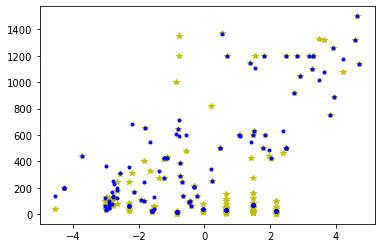

In [131]:
plt.plot(dfd[0],y_test,'y*')
plt.plot(dfd[0],y_pred,'b.')

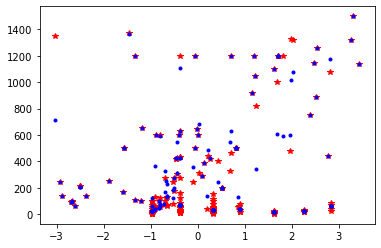

In [132]:
plt.plot(dfd[1],y_test,'r*')
plt.plot(dfd[1],y_pred,'b.')

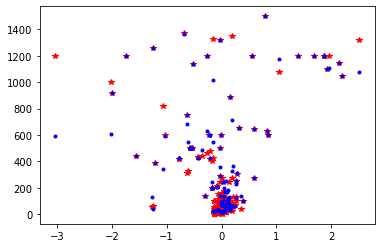

In [133]:
plt.plot(dfd[2],y_test,'r*')
plt.plot(dfd[2],y_pred,'b.')

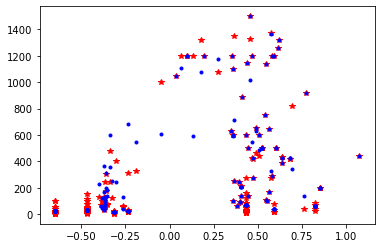

In [134]:
plt.plot(dfd[3],y_test,'r*')
plt.plot(dfd[3],y_pred,'b.')

### plots of ypred is very similar to plot of ytest. they are almost at the same points.this confirms the acc of model

### put capacity_mw column and predicted capacity_mw column side by side to observe the diff between these two columns
### make capacity_mwPred as int

In [136]:
y_pred=model.predict(principalComponents)
data=x
data['capacity_mwPred']=[round(i) for i in y_pred]
data['capacity_mw']=y
data['differnce']=data['capacity_mw']-data['capacity_mwPred']
data

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2015,generation_gwh_2017,fuel_type,capacity_mwPred,capacity_mw,differnce
2,2,1.0,0.384366,0.405586,0.376835,0,31,39.2,8.2
6,4,1.0,-1.637834,-1.465043,-1.424358,0,56,60.0,4.0
7,4,1.0,-1.122862,-0.994350,-0.989228,0,190,192.0,2.0
8,4,1.0,-1.302836,-1.471462,-1.166405,0,282,290.0,8.0
11,4,1.0,-1.090421,-1.040778,-1.015060,0,134,134.0,0.0
...,...,...,...,...,...,...,...,...,...
74,1,1.0,0.384366,0.405586,0.376835,1,65,10.0,-55.0
473,1,1.0,2.653638,3.274105,2.271982,1,1000,1000.0,0.0
190,1,1.0,2.085049,1.865446,3.069109,1,1000,1000.0,0.0
168,1,1.0,0.384366,3.237068,1.049973,1,1195,1200.0,5.0


### observing the above dataframe we can see that there is only slight difference between actual and predicted values
### plot graph to check actual vs pred value

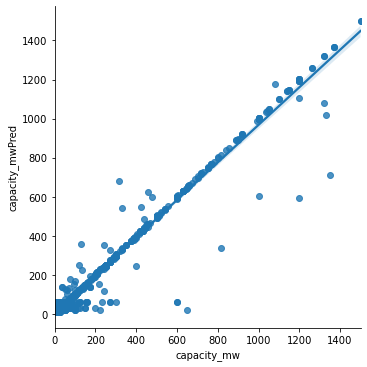

In [137]:
sn.lmplot(x='capacity_mw',y='capacity_mwPred',data=data,palette='rainbow')

### analyze how similar dist plot are of actual and predicted values

<AxesSubplot:xlabel='capacity_mwPred', ylabel='Density'>

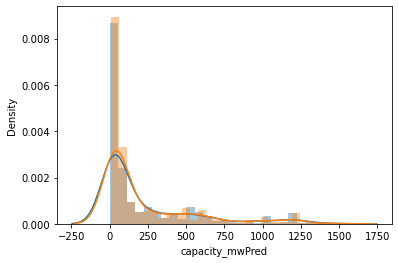

In [138]:
sn.distplot(data['capacity_mw'])
sn.distplot(data['capacity_mwPred'])

### Model has accuracy around 93%.
### Save model

In [139]:
joblib.dump(model,'capacity_mw.pkl')

['capacity_mw.pkl']